# Recurrent Neural Networks: RNN and LSTM

### A first Recurrent Neural Network layer

The recurrent loops in an RNN allow relevant information to persist over time. A simple RNN architecture is shown here:

<img src="images/RNN-rolled.png" width='100'/>

A simple RNN takes not only an input `X` at time step `t` but also passes a hidden state that is the output of the previous time step into the network.

<img src="images/SimpleRNN.png" width='500'/>

`SimpleRNN` processes batches of sequences, like all other Keras layers. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, input_features)`.


**As first thing, from Keras import `SimpleRNN` and `Embedding`.**

*Note*: use a numpy version different from 1.20.1 [Here why](https://stackoverflow.com/questions/58479556/notimplementederror-cannot-convert-a-symbolic-tensor-2nd-target0-to-a-numpy/58678385#58678385)

In [1]:
from keras.layers import Embedding, SimpleRNN

Create the first simple following network:
- A first `Embedding` layer of input dimension 10000 and output dimension 32;
- A `SimpleRNN` (Fully-connected RNN, where the output is to be fed back to input) with 32 hidden units;

**Build a sequential model as described above and check for a summary of it.**

In [2]:
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32)) #  a fully-connected RNN where the output from previous timestep is to be fed to next timestep.


#print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


*Note:* Here it is important to understand the output shape and number of parameters each layer has
<img src="images/RNN_params.png" width='500'/>

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the output corresponding to the last timestep for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument. 

**Add the `return_sequences` constructure argument. Check the [documentation](https://keras.io/api/layers/recurrent_layers/simple_rnn/) to better understand how it works.**

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all intermediate layers to return full sequences.

**Add 3 others intermediate layer of 32 hidden units each. Get a summary of the network.**

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


*Note:* Here it is important to understand the output shape and number of parameters each layer has

### Dataset and Data Preprocessing

Now let's try to use such a model on the IMDB movie review classification problem. First, we have to preprocess the data. To that end, we load the data and pad the train and test datasets. 

We use the function `pad_sequence` to transform a list of sequences (input_train/input_test) into a 2D Numpy array of shape (num_samples, maxlen). Please refer to the documentation [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)

In [5]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print(y_test)
#each sequence is a list of integers
print("\nFirst sequence length in input_train: \n", len(input_train[0]))
#print("\nFirst sequence in input_train: \n", input_train[0])

print("\nFirst sequence length in input_test: \n", len(input_test[0]))
#print("\nFirst sequence in input_test: \n", input_test[0])

print('\nPad sequences (samples x time_step)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

#each padded sequence is now a list padded with maxlen-len(input_train[0]) zeros 
print("\nFirst padded sequence length in input_train: \n", len(input_train[0]))
#print("\nFirst padded sequence in input_train: \n", input_train[0])
print("\nFirst padded sequence length in input_test: \n", len(input_test[0]))
#print("\nFirst padded sequence in input_test: \n", input_test[0])

Loading data...
25000 train sequences
25000 test sequences
[0 1 1 ... 0 0 0]

First sequence length in input_train: 
 218

First sequence length in input_test: 
 68

Pad sequences (samples x time_step)

First padded sequence length in input_train: 
 500

First padded sequence length in input_test: 
 500


**Check the dimension/shape of train data and test data.**

In [6]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using:
- an `Embedding` layer of input size equal to max_features and output equal to 32;
- a `SimpleRNN` layer;

**Build the network as described above.**

In [7]:
from keras.layers import Dense
print(max_features)
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

10000


**Compile the model with `rmsprop` optimizer and `binary_crossentropy` loss.**

Remember that the task is a binary classification problem. We want to classify the movie reviews into positive or negative reviews

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

**Fit the model, consider 10 epochs, batch size 128 and validation split equal to 0.2.**

In [9]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 0.6418 - acc: 0.6128WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x143f8cd40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

Let's display the training and validation loss and accuracy:

**Fill in the #DO TOs to complete the plotting.**

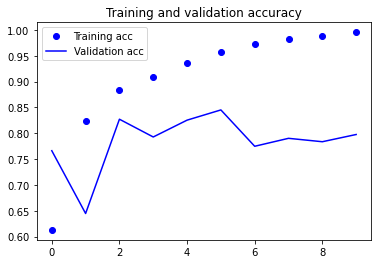

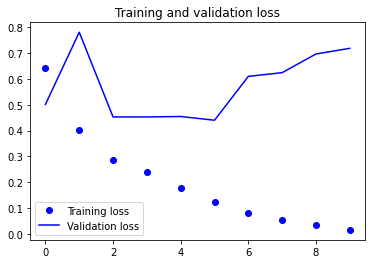

In [10]:
import matplotlib.pyplot as plt


acc = history.history['acc'] #TO DO: training accuracy
val_acc = history.history['val_acc'] #TO DO: validation accuracy
loss = history.history['loss'] #TO DO: training loss
val_loss = history.history['val_loss'] #TO DO: validation loss

epochs = range(len(acc))

# Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc') #TO DO: training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc') #TO DO: validation accuracy
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Loss
plt.plot(epochs, loss, 'bo', label='Training loss') #TO DO: training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss') #TO DO: validation loss
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM Example

From the lecture, we know that vanilla RNNs are simple but nor powerful.
The backward flow of gradients in RNN can explode or vanish. Thus, a more practical solution is to use LSTMs.

<img src="images/LSTM.png" width='500'/>

The operation inside are
<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/2db2cba6a0d878e13932fa27ce6f3fb71ad99cf1  width="400">

We will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, similar to the one with SimpleRNN that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you having to spend time tuning parameters by hand.If you are curious, see the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/)

**Consider the network you have implemented above, import and add an `LSTM` layer.**

In [19]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

**Print model summary**

In [20]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


*Note:* Here it is important to understand the output shape and number of parameters each layer has.
<img src="images/LSTM_params.png" width='600'/>

**Compile the model with `rmsprop` optimizer and `binary_crossentropy` loss.**

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

**Fit the model as before.**

In [15]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 0.4881 - acc: 0.7731WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1471944d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

Let's display the training and validation loss and accuracy:

**Fill in the #DO TOs to complete the plotting.**

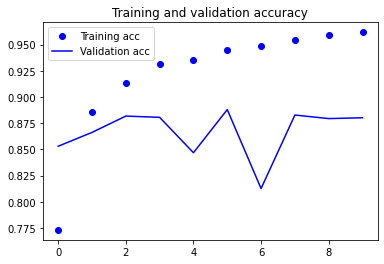

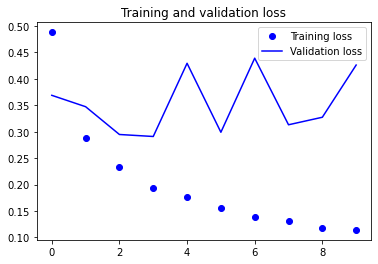

In [16]:
acc = history.history['acc'] #TO DO: training accuracy
val_acc = history.history['val_acc'] #TO DO: validation accuracy
loss = history.history['loss'] #TO DO: training loss
val_loss = history.history['val_loss'] #TO DO: validation loss

# Accuracy
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc') #TO DO: training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc') #TO DO
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()